# Part2 - Nonlinear Models
## Goal:
1. Compare the nonlinear models including:
* Random Forest
* Gradient Boosting Regression
* XGBoost

**What more you should know but we will not cover today:**
* LightGBM
* TensorFlow Decision Forests: TensorFlow Decision Forests
2. Hyperparameter Tuning
3. Compare model performance
4. Load all models and conduct feature importance analysis
* permutation importance [Link](https://scikit-learn.org/stable/modules/permutation_importance.html)
5. Intro to SHAPLEY Values

### Readings to review:
1. Intro to decision tree [Link](https://medium.com/@MrBam44/decision-trees-91f61a42c724#:~:text=A%20decision%20tree%20is%20a,Bagging%2C%20and%20Boosted%20Decision%20Trees.)

# Introduction to Decision Tree (in 5 seconds)
<p align="center">
<img src="../asset/decision_tree.PNG" alt="decision_tree" style="width:50%; border:0;">
</p>

* Root Nodes — It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.
* Decision Nodes — the nodes we get after splitting the root nodes are called Decision Node
* Leaf Nodes — the nodes where further splitting is not possible are called leaf nodes or terminal nodes
* Branch/Sub-tree — a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.
* Pruning — cutting down some nodes to stop overfitting.
* [Source](https://medium.com/@MrBam44/decision-trees-91f61a42c724#:~:text=A%20decision%20tree%20is%20aBagging%2C%20and%20Boosted%20Decision%20Trees)
## Random Forest, Gradient Boost Regression and, XGBoost



# Tutorials

### 1. Data Preprocessing
* Here we simply repeat the previosu steps

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
from tqdm import tqdm
import time

In [2]:
# Visualisation Style Configuration 
palette = ['#009688', '#ff5722','#795548','#3f51b5','#673ab7','#2196f3','#8bc34a','#9e9e9e', '#8ac52a', '#643e67']
alpha = 0.5
_theme = sns.set_theme(style="whitegrid", font="sans-serif",palette=palette[0:2], font_scale=0.100, rc={'grid.color': '#d4d5d6', 'grid.linewidth': 0.25})
_fig = plt.figure(figsize=(15,7))
_context = sns.set_context('paper', font_scale=1.4)
sns.set(rc={"figure.dpi":75, 'savefig.dpi':75})

<Figure size 1500x700 with 0 Axes>

In [5]:
# !pip install xgboost
# !pip install lightgbm
# !pip install shap

In [3]:
# load the previous processed data; refer to 02b_data_cleaning_advanced.ipynb for details.
df_train = pd.read_csv('./data/train_clean_advanced.csv', 
                       index_col='Id')
df_train.head()

,LotFrontage,LotArea,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBath,YearRemodAgg,TotalPorchSF,IsNew,AreaCondition,TotalSFCondition,GarageAreaCondition,TotalBsmntSFCondition,AreaQuality,TotalSFQuality,GarageAreaQuality,TotalBsmntSFQuality,AreaPerBedroom,TotalSFPerBedroom,MSSubClass_Other,MSSubClass_SC120,MSSubClass_SC160,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC80,MSSubClass_SC90,MSZoning_FV,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Other,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_Other,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_Other,Utilities_AllPub,Utilities_Other,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition2_Norm,Condition2_Other,BldgType_1Fam,BldgType_Duplex,BldgType_Other,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other,RoofMatl_CompShg,RoofMatl_Other,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Other,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_GasA,Heating_Other,Electrical_FuseA,Electrical_Other,Electrical_SBrkr,Functional_Other,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Other,MiscFeature_None,MiscFeature_Other,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.413268,0.366271,0.0,1.0,1.0,0.666667,0.500,0.949275,0.883333,0.12250,0.5,0.333333,0.666667,0.5,0.333333,1.000000,0.322669,0.333333,0.0,0.064212,0.266999,1.000000,1.0,0.180373,0.469747,0.0,0.684506,0.333333,0.0,0.666667,0.5,0.285714,0.333333,0.5,0.500000,0.000000,0.000000,0.996517,0.666667,0.50,0.394245,0.333333,0.333333,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,12.247699,0.366262,0.5,0.883333,0.595085,1.0,0.393912,0.270881,0.197691,0.193054,0.432802,0.319140,0.197691,0.184443,0.166834,0.137625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.490307,0.391245,0.0,1.0,0.5,0.555556,0.875,0.753623,0.433333,0.00000,0.0,0.333333,0.666667,0.5,1.000000,0.666667,0.446984,0.333333,0.0,0.121575,0.393637,1.000000,1.0,0.320663,0.000000,0.0,0.557071,0.000000,0.5,0.666

## 2. Hyperparameter Tuning
#### Grid Search Cross Validation
To find the best hyperparameters for our models, we will use grid search cross-validation. Grid search cross-validation will help us find the best combination of hyperparameters for our models by evaluating all possible combinations of hyperparameters in the grid. We will use RandomizedSearchCV to find the best hyperparameters for our models, as it is more efficient and scales better to large number of features than GridSearchCV.

In [4]:
# we split the data here again
non_feature = ['SalePrice']
X = df_train.drop(columns=non_feature)
y = df_train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=111) 

In [21]:
# define algorithms and parameters to be used for the girdsearch
random_state = 0
algorithms = [
    GradientBoostingRegressor(random_state=0),
    XGBRegressor(random_state=0),
    RandomForestRegressor(random_state=0)]

param_grid = [
    # parameters for GradientBoostingRegressor
    {'learning_rate': [0.05, 0.1, 0.15, 0.2],
     'min_samples_split': [3, 7, 11], 
     'min_samples_leaf': [2, 4, 6],
     'max_depth': [2, 5, 8],
     'n_estimators': [200, 250, 300],
     'max_features': ['sqrt', 'log2']},
    
    
    # parameters for XGBRegressor
    {'learning_rate': [ 0.025, 0.05, 0.075],
     'max_depth': [8, 9, 10],
     'min_child_weight': [4, 5, 6],
     'n_estimators': [200, 225, 250],
     'subsample': [0.45, 0.5, 0.55],
     'colsample_bytree': [0.25, 0.55, 0.75],
     'gamma': [0, 0.1, 0.25]},
    
    # parameters for RandomforestRegressor
    {'n_estimators': [100, 150, 200],
     'max_depth': [8, 9, 10],
     'min_samples_split': [3, 7, 11],
     'min_samples_leaf': [2, 4, 6],
     'max_features': ['sqrt', 'log2'],
     'bootstrap': [True, False]},
    
]

In [11]:
para = {'learning_rate': [0.05, 0.1, 0.15, 0.2],
     'min_samples_split': [3], 
     'min_samples_leaf': [2],
     'max_depth': [2],
     'n_estimators': [200],
     'max_features': ['sqrt']}
algo_1 = GradientBoostingRegressor(random_state=0)
start = time.time()
rand_search = RandomizedSearchCV(algo_1, 
                                 para,
                                     n_iter=100,
                                     cv=10, 
                                     n_jobs=-1, 
                                     random_state=0)
rand_search.fit(X_train, y_train)
rand_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 2,
 'learning_rate': 0.1}

In [13]:
para = {'learning_rate': [0.1],
     'min_samples_split': [3, 7, 11], 
     'min_samples_leaf': [2],
     'max_depth': [2],
     'n_estimators': [200],
     'max_features': ['sqrt']}
algo_2 = GradientBoostingRegressor(random_state=0)
start = time.time()
rand_search = RandomizedSearchCV(algo_2, 
                                 para,
                                     n_iter=100,
                                     cv=10, 
                                     n_jobs=-1, 
                                     random_state=0)
rand_search.fit(X_train, y_train)
parameter2 = rand_search
rand_search.best_params_


{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 2,
 'learning_rate': 0.1}

In [18]:
parameter1 = rand_search
algo_1.set_params(**parameter1.best_params_)
# algo_2.set_params(**parameter2.best_params_)
print(parameter1.best_params_)
# fit the model
algo_1.fit(X_train, y_train)

# predict on the test set
X_test_predictions = algo_1.predict(X_test)
# algo_2.fit(X_train, y_train)

{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.1}


<Axes: >

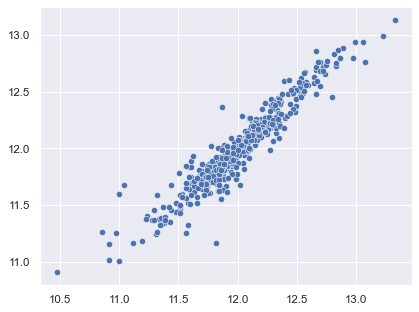

In [19]:
# y_test # real number
# X_test_predictions # predicted number
import seaborn as sns
sns.scatterplot(x=y_test, y=X_test_predictions)

In [20]:
r2 = r2_score(y_test, X_test_predictions)
rmse = mean_squared_error((y_test), 
                              (X_test_predictions), 
                              squared=False)
print(f'R2 score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R2 score: 0.9041
RMSE: 0.1220


In [22]:
# Perform random search to find the best parameters for each algorithm using RandomizedSearchCV

best_params = []
for i, algo in tqdm(enumerate(algorithms)):
    start = time.time()
    rand_search = RandomizedSearchCV(algo, param_grid[i],
                                     n_iter=100,
                                     cv=10, n_jobs=-1, 
                                     random_state=0)
    rand_search.fit(X_train, y_train)
    best_params.append(rand_search.best_params_)
    end = time.time()
    print(f"{algo.__class__.__name__} Time taken to fit: {round(((end - start) / 60),2)} minutes | Best parameters: {rand_search.best_params_}")
    
# Update the pipeline with the best parameters for each algorithm
for i, algo in enumerate(algorithms):
    algo.set_params(**best_params[i])

# Fit the final pipeline with the best parameters
for algo in algorithms:
    algo.fit(X_train, y_train)

1it [00:38, 38.95s/it]

GradientBoostingRegressor Time taken to fit: 0.65 minutes | Best parameters: {'n_estimators': 250, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.05}


2it [01:24, 42.98s/it]

XGBRegressor Time taken to fit: 0.76 minutes | Best parameters: {'subsample': 0.45, 'n_estimators': 225, 'min_child_weight': 6, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.55}


3it [02:00, 40.16s/it]

RandomForestRegressor Time taken to fit: 0.6 minutes | Best parameters: {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


### Visualize the prediction and actual results after the parameter tuning

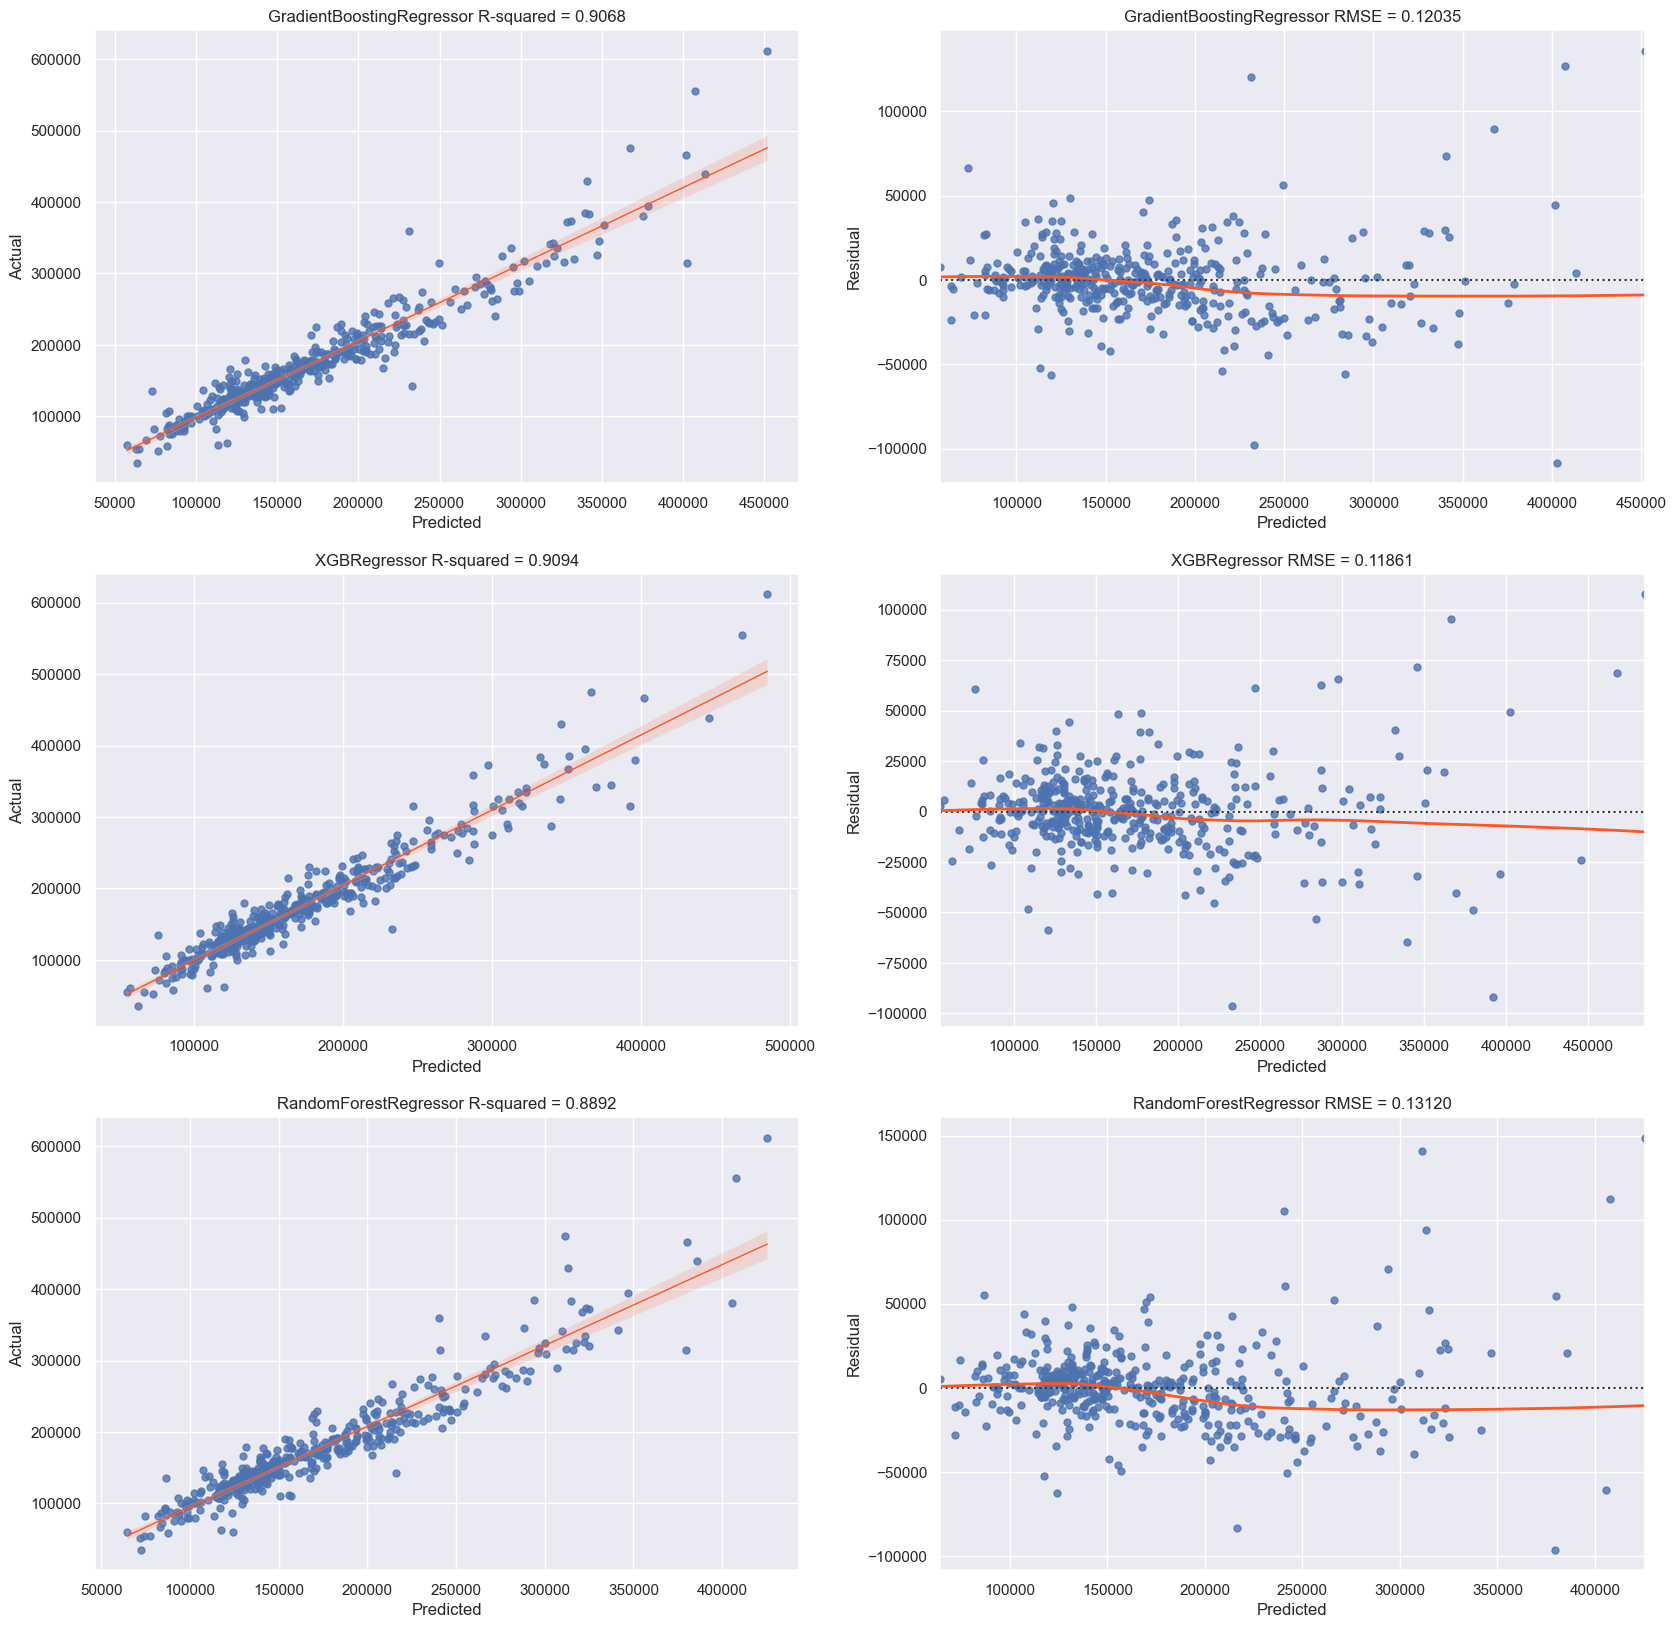

In [23]:
# Visualize the models with the best parameters chosen

fig, ax = plt.subplots(3, 2, figsize=(20, 20), dpi=100)

for i, algo in enumerate(algorithms):
    algo.fit(X_train, y_train)
    X_test_predictions = algo.predict(X_test)
    
    # Calculate R-squared and RMSE
    r2 = r2_score(y_test, X_test_predictions)
    rmse = mean_squared_error((y_test), 
                              (X_test_predictions), 
                              squared=False)
    
    # Plot the scatter plot on the first subplot
    sns.regplot(x=np.exp(X_test_predictions), y=np.exp(y_test), scatter_kws={'s':25}, line_kws={'color': palette[1], 'lw':1}, ax=ax[i, 0])
    ax[i, 0].set_title(f"{algo.__class__.__name__} R-squared = {r2:.4f}")
    ax[i, 0].set_xlabel("Predicted")
    ax[i, 0].set_ylabel("Actual")
    
    # Plot the residual plot on the second subplot
    sns.residplot(x=np.exp(X_test_predictions), y=np.exp(y_test), lowess=True, scatter_kws={'s':25}, line_kws={'color':palette[1],'lw':2}, ax=ax[i, 1])
    ax[i, 1].set_title(f"{algo.__class__.__name__} RMSE = {rmse:.05f}")
    ax[i, 1].set_xlabel("Predicted")
    ax[i, 1].set_ylabel("Residual")
    
plt.show()

In [24]:
# create set for the validation score of each model 



def validate_score(y_test, x_valid_predictions, model_name, dataset = "test"):
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, x_valid_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, x_valid_predictions)
    r2 = r2_score(y_test, x_valid_predictions)

    # Print evaluation metrics
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("Mean Absolute Error: ", mae)
    print("R-squared: ", r2)

    # Return the evaluation metrics
    return {
        'Model': model_name,
        'Dataset': dataset,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2,
        
        }


### More to experiment in this step
* The student should also try lightGBM
* Average Ensemble: [Link](https://towardsdatascience.com/ensemble-averaging-improve-machine-learning-performance-by-voting-246106c753ee)
* The student should also run the following linear regression models and store the results for comparison

## Summary all model results and understand the differences

In [25]:
linearmodels = [
    LassoCV(cv = 5),
    RidgeCV(cv = 5)
]
algorithms.extend(linearmodels) # run this once only

In [26]:

# refer to 02_linear_prediction.ipynb for more details
validation_scores  = []

# we use all models to predict the test data and calculate the validation score
for i, algo in enumerate(algorithms):
    algo.fit(X_train, y_train)
    X_test_predictions = algo.predict(X_test)
    
    # Calculate R-squared and RMSE
    # if algo.__class__.__name__ == 'LinearRegression':
    #     X_test_predictions = np.exp(X_test_predictions)
    #     y_test_adjust = np.exp(y_test)
    #     mse = mean_squared_error(y_test_adjust, X_test_predictions)
    #     rmse = np.sqrt(mse)
    #     mae = mean_absolute_error(y_test_adjust, X_test_predictions)
    #     r2 = r2_score(y_test_adjust, X_test_predictions)
        
        # also save the train metrics to check overfitting
        
    score_test = validate_score(y_test, X_test_predictions, algo.__class__.__name__)
    validation_scores.append(score_test)
    score_train = validate_score(y_train, algo.predict(X_train), algo.__class__.__name__, dataset = "train")
    validation_scores.append(score_train)
    
    
    

Mean Squared Error:  0.01448449500020468
Root Mean Squared Error:  0.12035154756048914
Mean Absolute Error:  0.0805390939313724
R-squared:  0.9067638337547941
Mean Squared Error:  0.0019955019925387
Root Mean Squared Error:  0.044671041990742726
Mean Absolute Error:  0.03180168235825562
R-squared:  0.9872985421149482
Mean Squared Error:  0.014069148719452881
Root Mean Squared Error:  0.11861344240621668
Mean Absolute Error:  0.08243114277559205
R-squared:  0.9094374026214308
Mean Squared Error:  0.0011788547760046286
Root Mean Squared Error:  0.03433445464842319
Mean Absolute Error:  0.023172986868713382
R-squared:  0.992496537539927
Mean Squared Error:  0.01721219690667067
Root Mean Squared Error:  0.1311952625161087
Mean Absolute Error:  0.0890314272691269
R-squared:  0.8892057160285609
Mean Squared Error:  0.0031431060874090376
Root Mean Squared Error:  0.0560634113072781
Mean Absolute Error:  0.03829236665506348
R-squared:  0.979993991613766
Mean Squared Error:  0.01254280884455599

In [27]:
# validation_scores = validation_scores[:6]
validation_scores_df = (
    pd.DataFrame(validation_scores)
    .applymap(lambda x: f"{x:.5f}" if isinstance(x, float) else x)
        .sort_values(by=['Model'], ascending=False)
)
validation_scores_df

,Model,Dataset,MSE,RMSE,MAE,R-squared
2,XGBRegressor,test,0.01407,0.11861,0.08243,0.90944
3,XGBRegressor,train,0.00118,0.03433,0.02317,0.99250
8,RidgeCV,test,0.01338,0.11568,0.07952,0.91386
9,RidgeCV,train,0.00952,0.09755,0.06874,0.93943
4,RandomForestRegressor,test,0.01721,0.13120,0.08903,0.88921
5,RandomForestRegressor,train,0.00314,0.05606,0.03829,0.97999
6,LassoCV,test,0.01254,0.11199,0.07676,0.91926
7,LassoCV,train,0.00994,0.09968,0.06957,0.93676
0,GradientBoostingRegressor,test,0.01448,0.12035,0.08054,0.90676
1,GradientBoostingRegressor,train,0.00200,0.04467,0.03180,0.98730


#### Summary
* GBMs are more sensitive to overfitting if the data is noisy.
* Training generally takes longer because of the fact that trees are built sequentially.
* GBMs are harder to tune than RF. There are typically three parameters: number of trees, depth of trees and learning rate, and each tree built is generally shallow.

## 3. Compare the feature importance
* Most of urban analysis not only love predictions, but also relationships. Here we provide some analysis to check the feature importance
* Permutation Importance [Link](https://scikit-learn.org/stable/modules/permutation_importance.html)
* SHAP values [Link](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)
### Permutation Importance

In [28]:
# refer to 02_linear_prediction.ipynb for more details
perm_importance_ls  = []

# we use all models to predict the test data and calculate the validation score
for i, algo in enumerate(algorithms):
    algo.fit(X_train, y_train)
    X_test_predictions = algo.predict(X_test)
    perm_importance = permutation_importance(algo, 
                                         X_test, 
                                         y_test,
                                         n_repeats=30, # The n_repeats parameter sets the number of times a feature is randomly shuffled and returns a sample of feature importances.
                                         random_state=0) # by default, the validation score is R2, we can set to be others
    perm_importance_ls.append(perm_importance)

In [79]:
perm_importance_ls[0].keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [29]:
# only keep the parameters that are significant
permutation_df = []
for i, algo in enumerate(algorithms):
    algo_name = algo.__class__.__name__
    pm = pd.DataFrame({
        'variables':X_test.columns,
        'importances_mean': perm_importance_ls[i]['importances_mean'],
        'importances_std': perm_importance_ls[i]['importances_std'],
        }).sort_values(by=['importances_mean'], ascending=False)
    pm['algo_name'] = algo_name
    permutation_df.append(pm)
permutation_df = pd.concat(permutation_df)
# only keep the siginificant and top 20 features per model
permutation_df = (permutation_df[permutation_df['importances_mean'] > 2*permutation_df['importances_std']]
                  .sort_values(by=['importances_mean'], ascending=False)
                  .groupby('algo_name').head(20))
permutation_df

,variables,importances_mean,importances_std,algo_name
65,TotalSFQuality,0.138435,0.009098,XGBRegressor
65,TotalSFQuality,0.098518,0.006505,LassoCV
26,GrLivArea,0.063985,0.005984,LassoCV
65,TotalSFQuality,0.057761,0.004047,RandomForestRegressor
65,TotalSFQuality,0.050093,0.004576,GradientBoostingRegressor
...,...,...,...,...
81,MSZoning_Other,0.001639,0.000431,XGBRegressor
101,Neighborhood_Crawfor,0.001535,0.000346,XGBRegressor
74,MSSubClass_SC30,0.001515,0.000541,LassoCV
132,Exterior1st_BrkFace,0.001514,0.000407,LassoCV


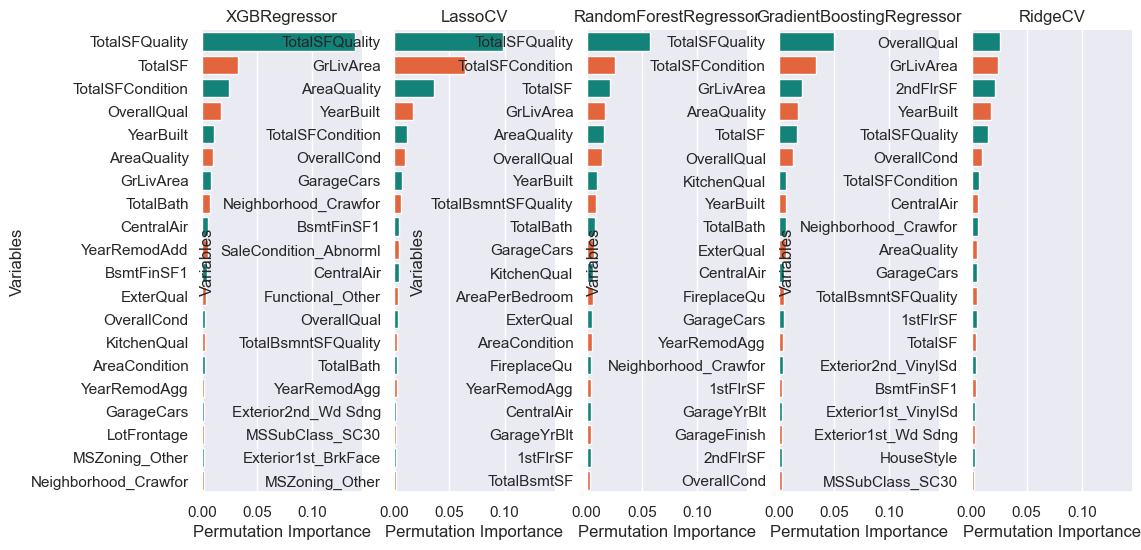

In [30]:
# visualize the permutation importance by each model, only plot the first 20 features
# Note that different model may have different results
fig, axes = plt.subplots(1, 5, figsize=(12, 6), dpi=100,
                         sharex=True)
for i, algo_name in enumerate(permutation_df['algo_name'].unique()):
    sns.barplot(
        data=permutation_df[permutation_df['algo_name'] == algo_name], 
                x='importances_mean', 
                y='variables', 
                ax=axes[i],
                palette=palette[0:2])
    axes[i].set_title(algo_name)
    axes[i].set_xlabel("Permutation Importance")
    axes[i].set_ylabel("Variables")
    sns.despine()
    


## The famous SHAPLEY plot
Shapley values are a widely used approach from cooperative game theory that come with desirable properties.
* https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html
* Original Paper: Chen, H., Covert, I.C., Lundberg, S.M. et al. Algorithms to estimate Shapley value feature attributions. Nat Mach Intell 5, 590–601 (2023). https://doi-org.eproxy.lib.hku.hk/10.1038/s42256-023-00657-x

#### Beeswarm summary plot
The beeswarm plot is designed to display an information-dense summary of how the top features in a dataset impact the model’s output. Each instance the given explanation is represented by a single dot on each feature fow. The x position of the dot is determined by the SHAP value (shap_values.value[instance,feature]) of that feature, and dots “pile up” along each feature row to show density. Color is used to display the original value of a feature (shap_values.data[instance,feature]).


GradientBoostingRegressor


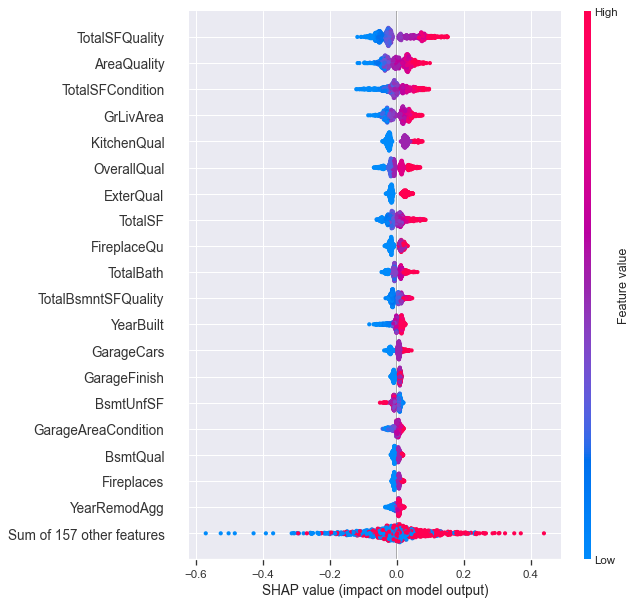

In [106]:
selmodel = algorithms[0]
print(selmodel.__class__.__name__)
# only use this model to understand shapely plots
import shap
explainer = shap.Explainer(selmodel)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values, max_display=20)

#### Partial Dependence Plot
* Partial dependence plots (PDP) show the dependence between the target response and a set of input features of interest, marginalizing over the values of all other input features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the input features of interest.
* To understand a feature’s importance in a model, it is necessary to understand both how changing that feature impacts the model’s output, and also the distribution of that feature’s values. 
*  When we are explaining a prediction `f(x)`, the SHAP value for a specific feature `i` is just the difference between the expected model output and the partial dependence plot at the feature’s value `x_i`

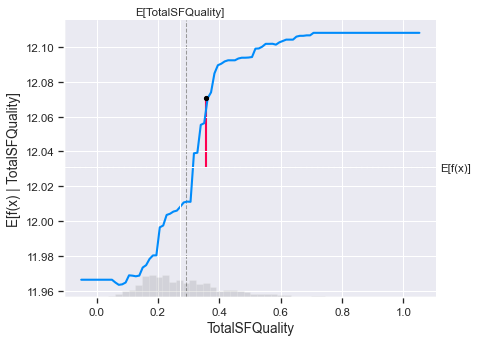

In [108]:
# make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 0
fig, ax = shap.partial_dependence_plot(
    "TotalSFQuality",
    selmodel.predict,
    X_train,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

In [ ]:
# TODO: 

# Course work:
* Select one model and use the ./data/test.csv data to create the final prediction
* create a Kaggle account and submit your results to: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
* Repeat the shapely analysis for a linear model